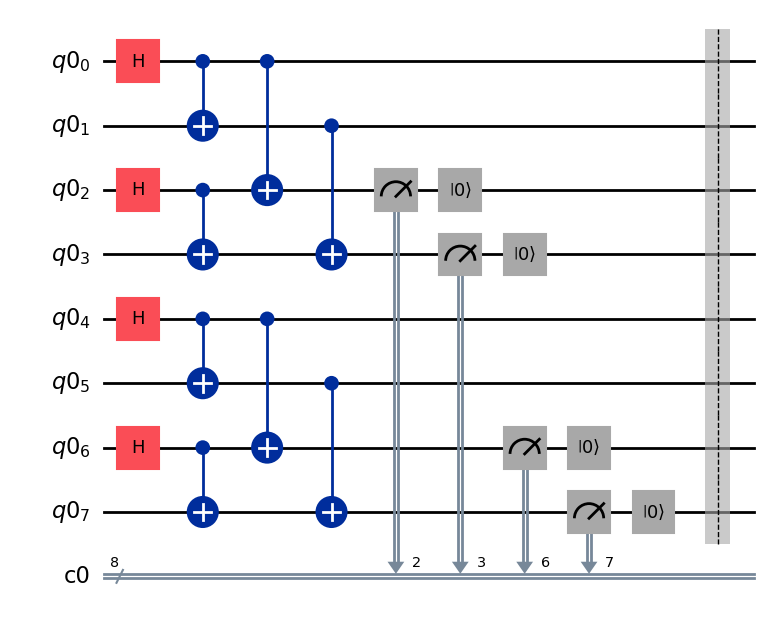

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(8)
cr = ClassicalRegister(8)

circ = QuantumCircuit(qr, cr)
# Hadamard gate initializations
circ.h(qr[0])
circ.h(qr[2])
circ.h(qr[4])
circ.h(qr[6])

# Adding CNOTs
circ.cx(qr[0], qr[1])
circ.cx(qr[2], qr[3])
circ.cx(qr[4], qr[5])
circ.cx(qr[6], qr[7])

# Cross pair CNOTS
circ.cx(qr[0], qr[2])
circ.cx(qr[1], qr[3])
circ.cx(qr[4], qr[6])
circ.cx(qr[5], qr[7])
circ.measure(qr[2], cr[2])
circ.reset(qr[2])
circ.measure(qr[3], cr[3])
circ.reset(qr[3])
circ.measure(qr[6], cr[6])
circ.reset(qr[6])
circ.measure(qr[7], cr[7])
circ.reset(qr[7])

circ.barrier()

circ.draw(output='mpl')

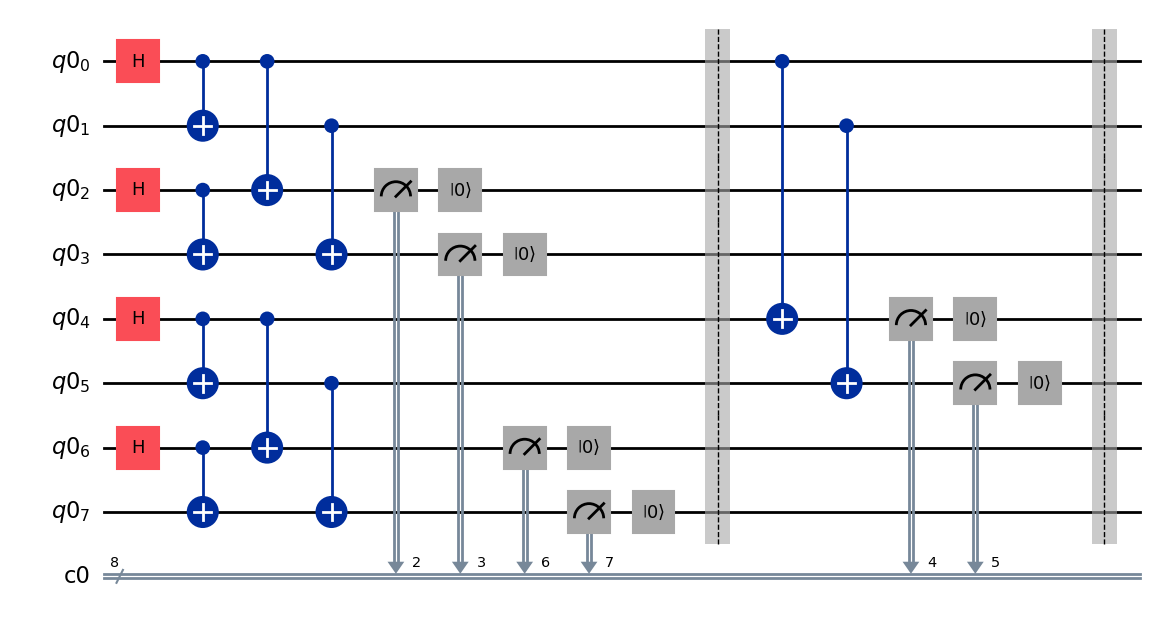

In [3]:
circ.cx(qr[0], qr[4])
circ.cx(qr[1], qr[5])

circ.measure(qr[4], cr[4])
circ.reset(qr[4])
circ.measure(qr[5], cr[5])
circ.reset(qr[5])

circ.barrier()

circ.draw(output='mpl')

In [4]:
circ.cx(qr[0], qr[1])
circ.h(qr[0])

circ.measure(qr[0], cr[0])
circ.measure(qr[1], cr[1])

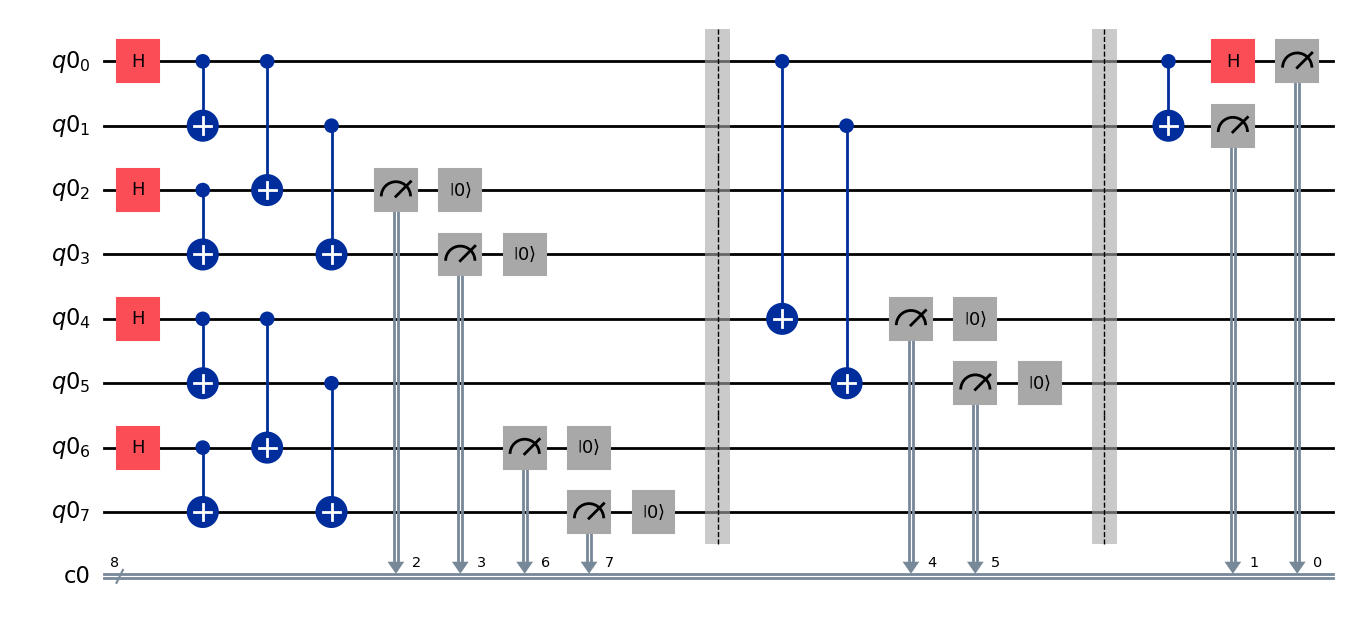

In [5]:
circ.draw(output='mpl')

In [6]:
from qiskit import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

service = QiskitRuntimeService()
backend = service.backend(name='ibm_rensselaer')

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

sampler = Sampler(mode=backend)

In [7]:
isa_circuit = pm.run(circ)

In [8]:
job = sampler.run([isa_circuit], shots=8192)
print(f"Job ID: {job.job_id()}")

Job ID: cx8wtp2pjw30008h0xw0


In [9]:
result = service.job('cx8wtp2pjw30008h0xw0').result()

In [17]:
from collections import Counter

stack = Counter({})

data = result[0].data.c0.get_counts()
stack += Counter(data)

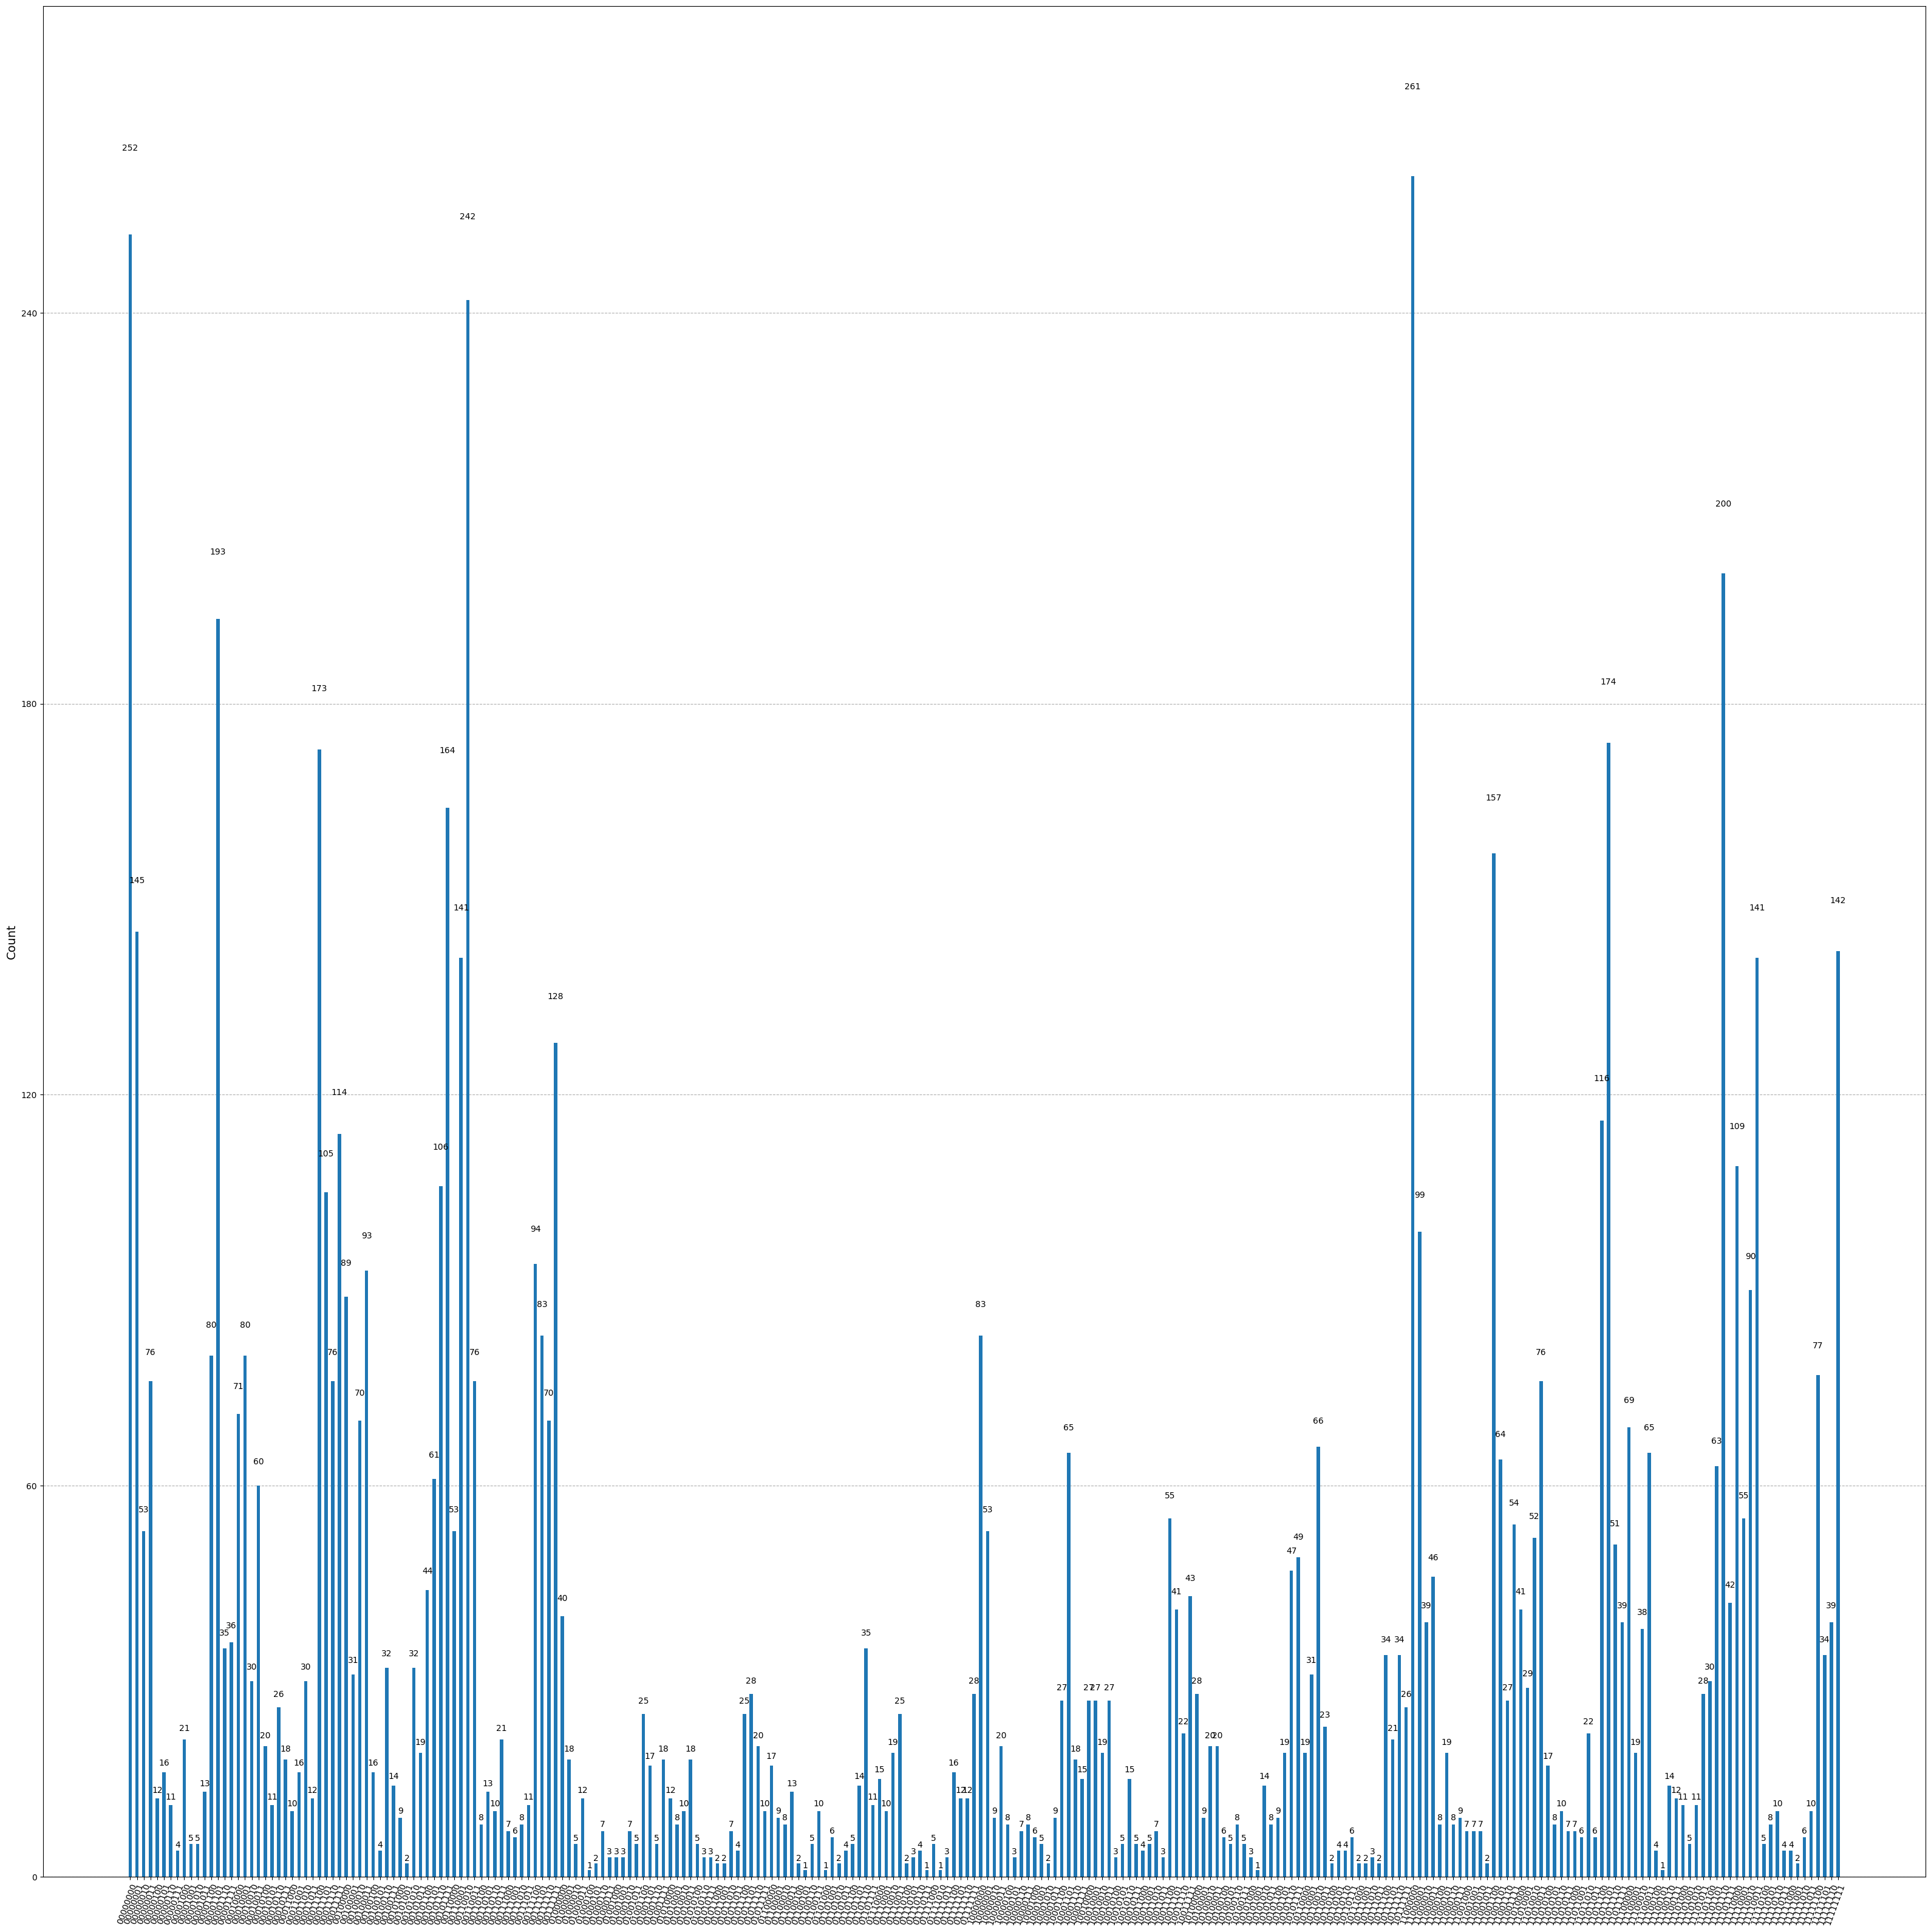

In [18]:
from qiskit.visualization import plot_histogram

plot_histogram(data, figsize=(40, 40))

In [19]:
(stack['00000000'] + stack['11000000']) / stack.total()

0.0626220703125

In [20]:
final_stack = Counter({})

for i in range(10):
  job = sampler.run([isa_circuit], shots=8192)
  result = job.result()
  data = result[0].data.c0.get_counts()
  final_stack += Counter(data)

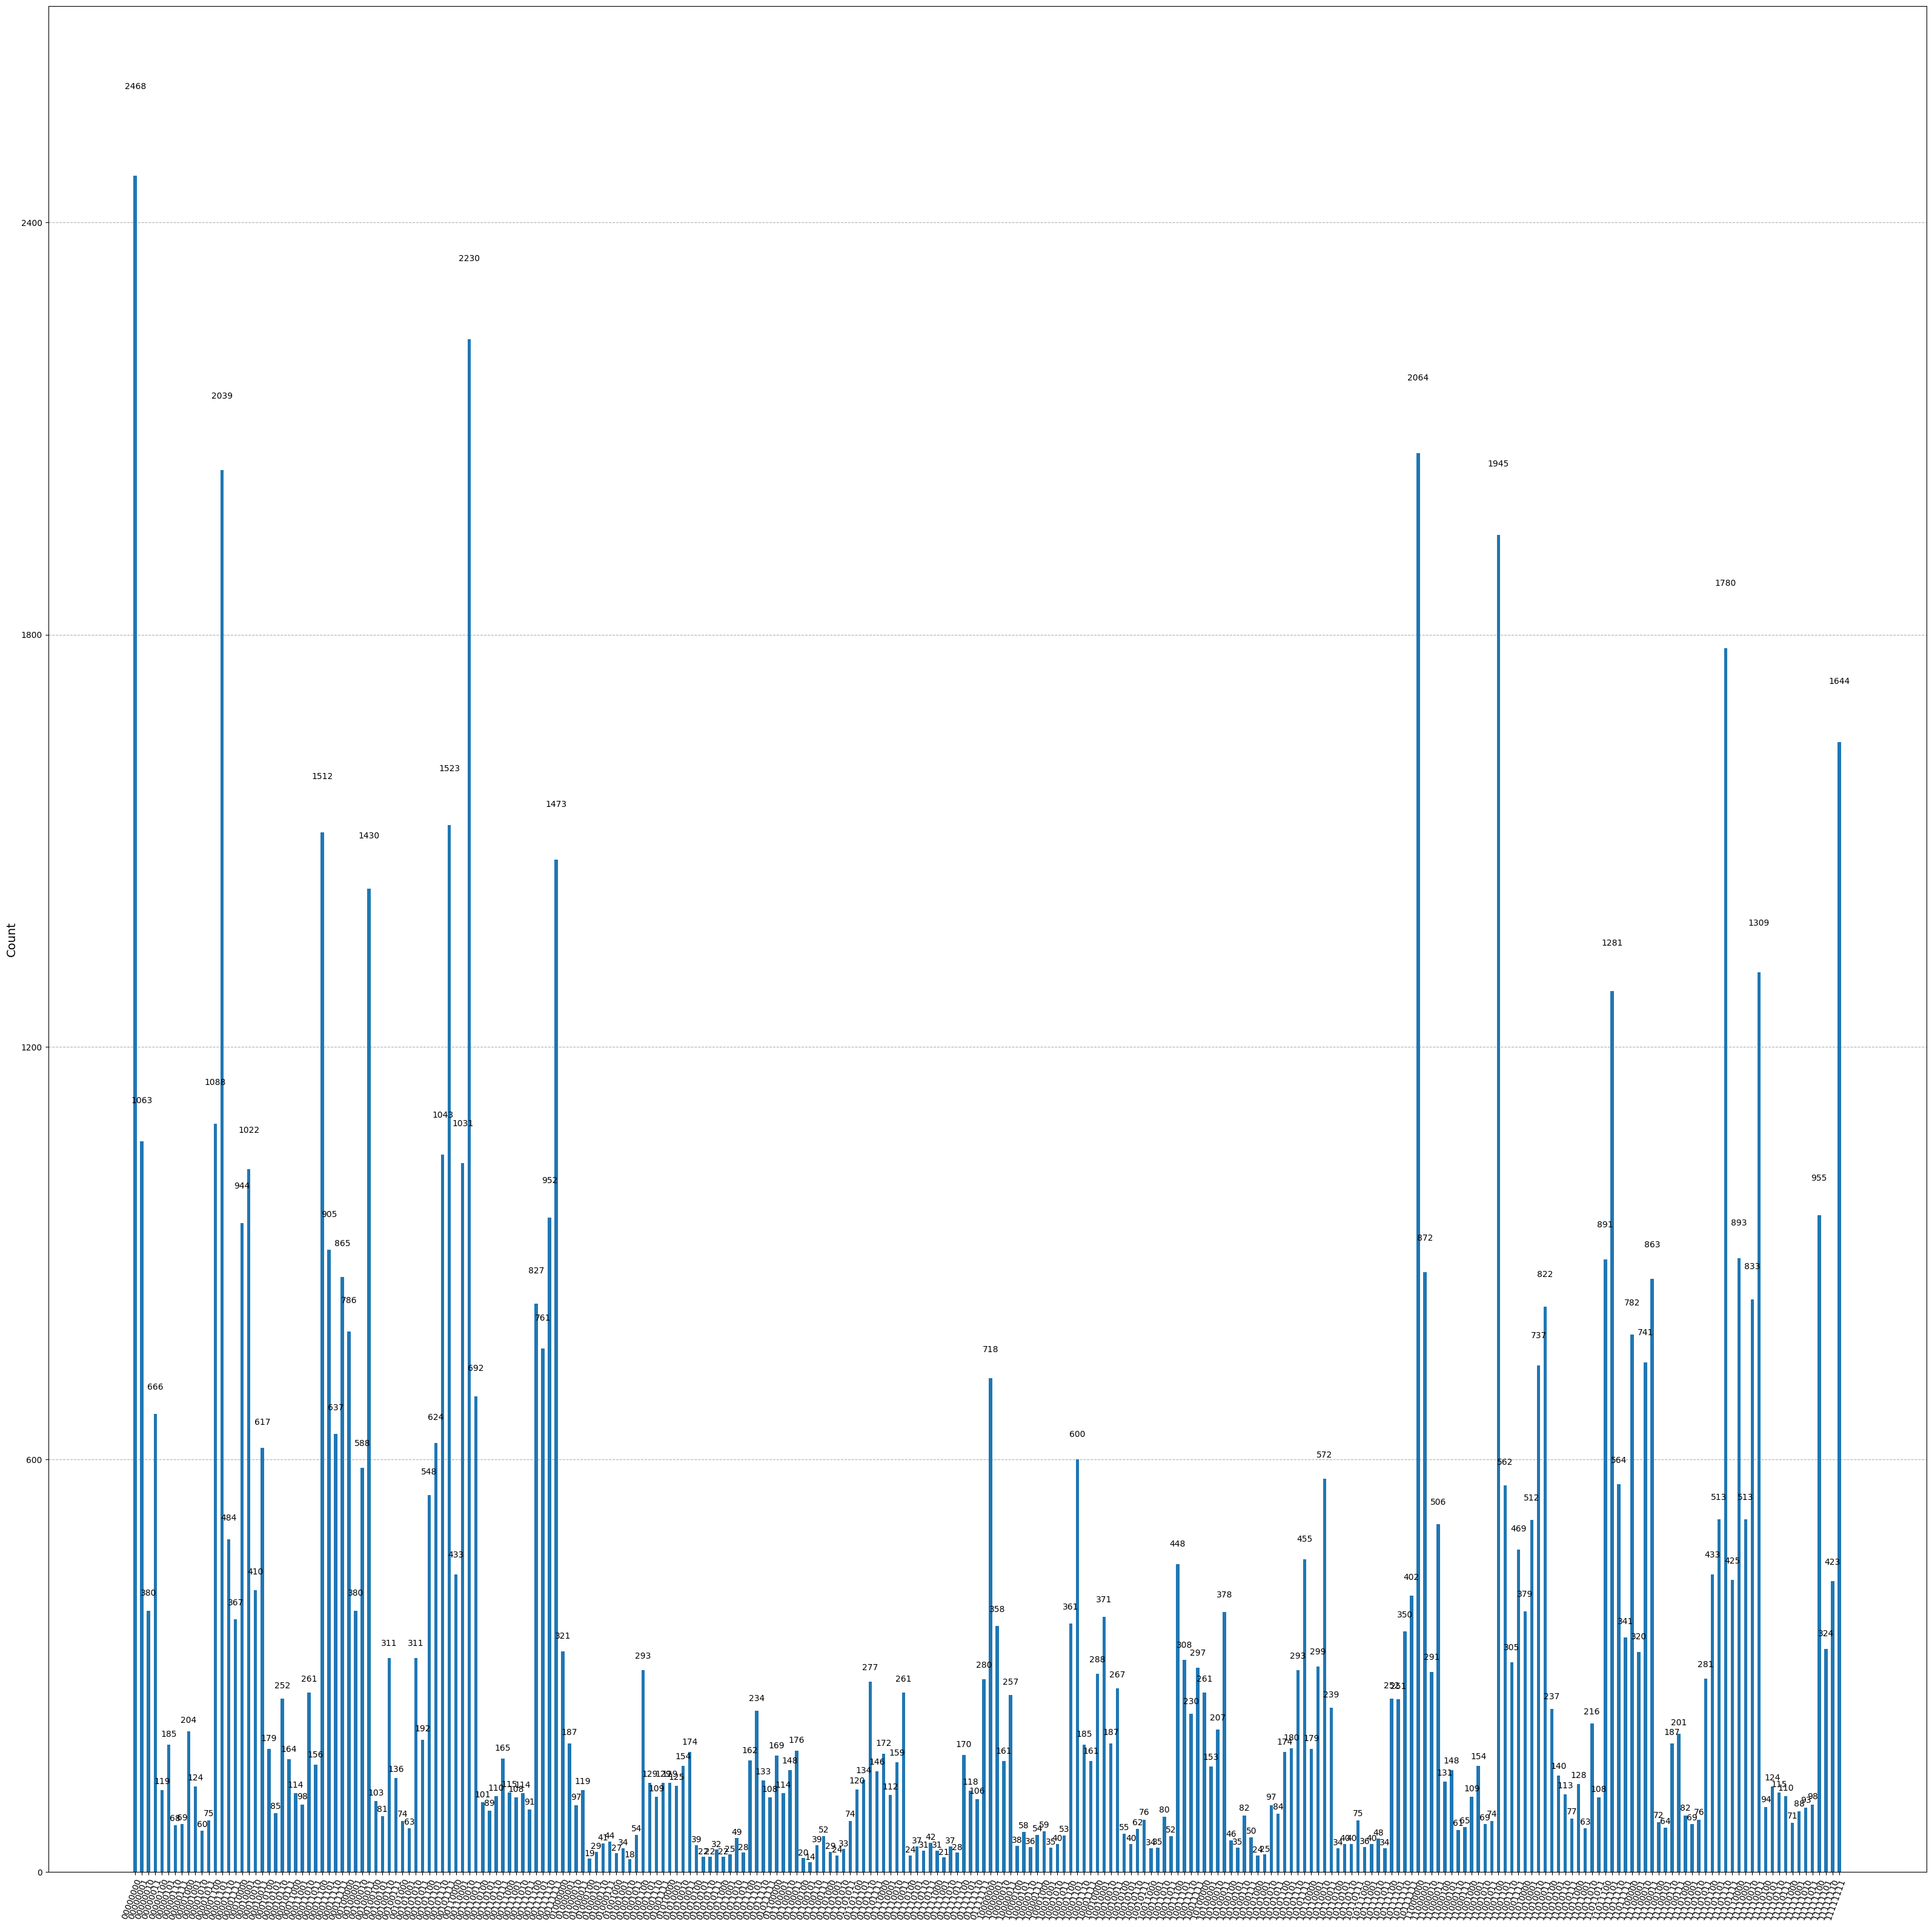

In [21]:
plot_histogram(data=final_stack, figsize=(40, 40))

In [23]:
(final_stack['00000000'] + final_stack['11000000']) / final_stack.total()

0.055322265625